#Inteligencia Artificial 2019-1 Proyecto Agricultura

Cristian Andrés Picón Rodríguez - 2160082\
Andrea Juliana Villalba Santos    - 2162114 \

## Import lines

In [0]:
import os
import sys

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import *


from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
DATA_DIR   = "/content/drive/My Drive/AI_2019/Project/Data2/"
csvList    = []
csvMapName = {}
for index,csvName in enumerate(os.listdir(DATA_DIR)):
  csvList.append(pd.read_csv(DATA_DIR + csvName))
  structure = csvName.split('.')
  #print(csvName)
  csvMapName.update({
      structure[0] : csvList[index]
  }) 

##_ Creation of the useful DataSet

In [0]:
DATA_DIR   = "/content/drive/My Drive/AI_2019/Project/Project_Data/"
csvList    = []
csvMapName = {}
for index,csvName in enumerate(os.listdir(DATA_DIR)):
  csvList.append(pd.read_csv(DATA_DIR + csvName))
  structure = csvName.split('_')
  #print(csvName)
  csvMapName.update({
      structure[2] : csvList[index]
  }) 

In [0]:
#Quitar las columnas que nos sirven del dataset cargado y ponerlas en el nuevo.
csvDataMap  = {}
csvDataList = []
for index,i in enumerate(csvMapName):
  Dtemp = pd.DataFrame(csvMapName[i])
  tempCol = Dtemp.columns
  csvDataset = pd.DataFrame({tempCol[1]:Dtemp[tempCol[1]],
                            tempCol[3]:Dtemp[tempCol[3]],
                            tempCol[5]:Dtemp[tempCol[5]],
                            tempCol[10]:Dtemp[tempCol[10]],
                            tempCol[11]:Dtemp[tempCol[11]],
                            tempCol[12]:Dtemp[tempCol[12]],
                            tempCol[13]:Dtemp[tempCol[13]],
                            tempCol[14]:Dtemp[tempCol[14]]})
  csvDataMap.update({i:csvDataset})
for i in csvDataMap:
  csvDataMap[i].columns=['DEPARTAMENTO','MUNICIPIO','CULTIVO',
                                'PERIODO','Área Sembrada(ha)','Área Cosechada(ha)',
                                'Producción(t)','Rendimiento(t/ha)']

In [24]:
csvDataMap['Maiz'].head()

,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
0,ANTIOQUIA,PUERTO BERRIO,MAIZ FORRAJERO,2018A,150,150,4200,28.0
1,ANTIOQUIA,LA UNION,MAIZ FORRAJERO,2018A,23,22,726,33.0
2,CESAR,EL PASO,MAIZ FORRAJERO,2018A,320,74,222,3.0
3,CESAR,SAN ALBERTO,MAIZ FORRAJERO,2018A,35,0,0,0.0
4,CESAR,GONZALEZ,MAIZ FORRAJERO,2018A,31,0,0,0.0


In [25]:
csvDataMap['Maiz'].info()
csvDataMap['Maiz'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8464 entries, 0 to 8463
Data columns (total 8 columns):
DEPARTAMENTO          8464 non-null object
MUNICIPIO             8464 non-null object
CULTIVO               8464 non-null object
PERIODO               8464 non-null object
Área Sembrada(ha)     8464 non-null int64
Área Cosechada(ha)    8464 non-null int64
Producción(t)         8464 non-null int64
Rendimiento(t/ha)     8464 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 529.1+ KB


,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
count,8464.000000,8464.000000,8464.000000,8464.000000
mean,264.245274,227.353025,663.750354,2.105919
std,925.831913,812.994040,4505.049040,3.444738
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,10.000000,16.000000,1.000000
50%,53.000000,45.000000,75.000000,1.500000
75%,215.000000,180.000000,339.250000,2.200000
max,33500.000000,32000.000000,210000.000000,45.000000


Para el tratamiento de datos es necesario reemplazar todos los datos alfanúmericos en el Data Frame por valores númericos. \
En los siguientes Dataframes se encuentran los Departamentos, Municipios, Subgrupo de Cultivo y Perido con sus respectivos ID.

In [26]:
DepId = {}
tempFullMap = []
tempRow = []
newData = pd.DataFrame()
for index,i in enumerate(csvDataMap):
  tempData = csvDataMap[i]        #Cada Dataset 
  tempCol = tempData.columns #Nombre de las columnas del Dataset
  tempColData = tempData[tempCol[0]].drop_duplicates()
  for k in tempColData:
    tempRow.append(k)
final = pd.Series(sorted(tempRow)).drop_duplicates()
final = final.reset_index()
del final['index']
final = final.rename(columns = {0:'Departamento'})
for m,n in enumerate(final['Departamento']):
  DepId.update({m:n})
print(final.shape)
final.head()

(32, 1)


,Departamento
0,AMAZONAS
1,ANTIOQUIA
2,ARAUCA
3,ATLANTICO
4,BOLIVAR


In [27]:
for index,i in enumerate(csvDataMap):    #Cada Dataset 
  for j in final['Departamento']:        #Cada Departamento
    cont = csvDataMap[i][csvDataMap[i].DEPARTAMENTO==j]['DEPARTAMENTO'].index
    if(cont.size > 0):
      for p in cont:
        csvDataMap[i].loc[p,'DEPARTAMENTO'] = list(DepId.keys())[list(DepId.values()).index(j)]        

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [28]:
MunId = {}
tempFullMap = []
tempRow = []
newData = pd.DataFrame()
for index,i in enumerate(csvDataMap):
  tempData = csvDataMap[i]        #Cada Dataset 
  tempCol = csvDataMap[i].columns #Nombre de las columnas del Dataset
  tempColData = tempData[tempCol[1]].drop_duplicates()
  for k in tempColData:
    tempRow.append(k)
final = pd.Series(sorted(tempRow)).drop_duplicates()
final = final.reset_index()
del final['index']
final = final.rename(columns = {0:'Municipio'})
for m,n in enumerate(final['Municipio']):
  MunId.update({m:n})
print(final.shape)
final.head(5)

(990, 1)


,Municipio
0,ABEJORRAL
1,ABREGO
2,ABRIAQUI
3,ACACIAS
4,ACANDI


In [29]:
for index,i in enumerate(csvDataMap):    #Cada Dataset 
  for j in final['Municipio']:        #Cada Departamento
    cont = csvDataMap[i][csvDataMap[i].MUNICIPIO==j]['MUNICIPIO'].index
    if(cont.size > 0):
      for p in cont:
        csvDataMap[i].loc[p,'MUNICIPIO'] = list(MunId.keys())[list(MunId.values()).index(j)]        

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [30]:
GrupId = {}
tempFullMap = []
tempRow = []
newData = pd.DataFrame()
for index,i in enumerate(csvDataMap):
  tempData = csvDataMap[i]        #Cada Dataset 
  tempCol = csvDataMap[i].columns #Nombre de las columnas del Dataset
  tempColData = tempData[tempCol[2]].drop_duplicates()
  for k in tempColData:
    tempRow.append(k)
final = pd.Series(sorted(tempRow)).drop_duplicates()
final = final.reset_index()
del final['index']
final = final.rename(columns = {0:'Cultivo'})
for m,n in enumerate(final['Cultivo']):
  GrupId.update({m:n})
final.head()

,Cultivo
0,AGUACATE
1,CACAO
2,CAFE
3,MAIZ
4,MAIZ FORRAJERO


In [31]:
for index,i in enumerate(csvDataMap):    #Cada Dataset 
  for j in final['Cultivo']:        #Cada Departamento
    cont = csvDataMap[i][csvDataMap[i].CULTIVO==j]['CULTIVO'].index
    if(cont.size > 0):
      for p in cont:
        csvDataMap[i].loc[p,'CULTIVO'] = list(GrupId.keys())[list(GrupId.values()).index(j)]     

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [32]:
PerId = {}
tempFullMap = []
tempRow = []
newData = pd.DataFrame()
for index,i in enumerate(csvDataMap):
  tempData = csvDataMap[i]        #Cada Dataset 
  tempCol = csvDataMap[i].columns  #Nombre de las columnas del Dataset
  tempColData = tempData[tempCol[3]].drop_duplicates()
  for k in tempColData:
    tempRow.append(k)
final = pd.Series(tempRow).drop_duplicates()
final = final.reset_index()
del final['index']
final = final.rename(columns = {0:'Periodo'})
for m,n in enumerate(final['Periodo']):
  PerId.update({m:n})
final.head()

,Periodo
0,2018
1,2017
2,2016
3,2018A
4,2017A


In [33]:
for index,i in enumerate(csvDataMap):    #Cada Dataset 
  for j in final['Periodo']:        #Cada Periodo
    cont = csvDataMap[i][csvDataMap[i].PERIODO==j]['PERIODO'].index
    if(cont.size > 0):
      for p in cont:
        csvDataMap[i].loc[p,'PERIODO'] = list(PerId.keys())[list(PerId.values()).index(j)]     

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [34]:
csvDataMap['Maiz'].head()
#for dataset in csvDataMap:
# print(csvDataMap[dataset].head())

,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
0,1,635,4,3,150,150,4200,28.0
1,1,435,4,3,23,22,726,33.0
2,10,275,4,3,320,74,222,3.0
3,10,717,4,3,35,0,0,0.0
4,10,342,4,3,31,0,0,0.0


In [0]:
DATA_DIR2   = "/content/drive/My Drive/AI_2019/Project/Data2/"
for i in csvDataMap: # csvDataMap es el diccionario que contiene todos los dataset
  csvDataMap[i].to_csv(DATA_DIR2+i+'.csv')
  

##The variable csvMapName is a Dictionary with the Datasets
\
The Keys to get every Datasets are:

In [40]:
print(csvMapName.keys())

dict_keys(['Cafe', 'Maiz', 'Tomate', 'Soya', 'Cacao', 'Aguacate'])


In [0]:
for i in csvMapName:
  del csvMapName[i][csvMapName[i].columns[0]]
  #csvMapName[i].to_csv(DATA_DIR+i+'2.csv')

## Data Treatment - Regression


In [0]:
dataset = csvMapName['Cafe']
dataset.head()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
0,0,1,35,2,0,10380,7648,9888,1.3
1,1,1,201,2,0,10063,7374,11439,1.6
2,2,1,711,2,0,7857,5929,11057,1.9
3,3,1,210,2,0,6880,5306,9896,1.9
4,4,1,91,2,0,6445,4749,7368,1.6


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2.0, top=2.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  ax.set_xlim(boundaries_list[i])


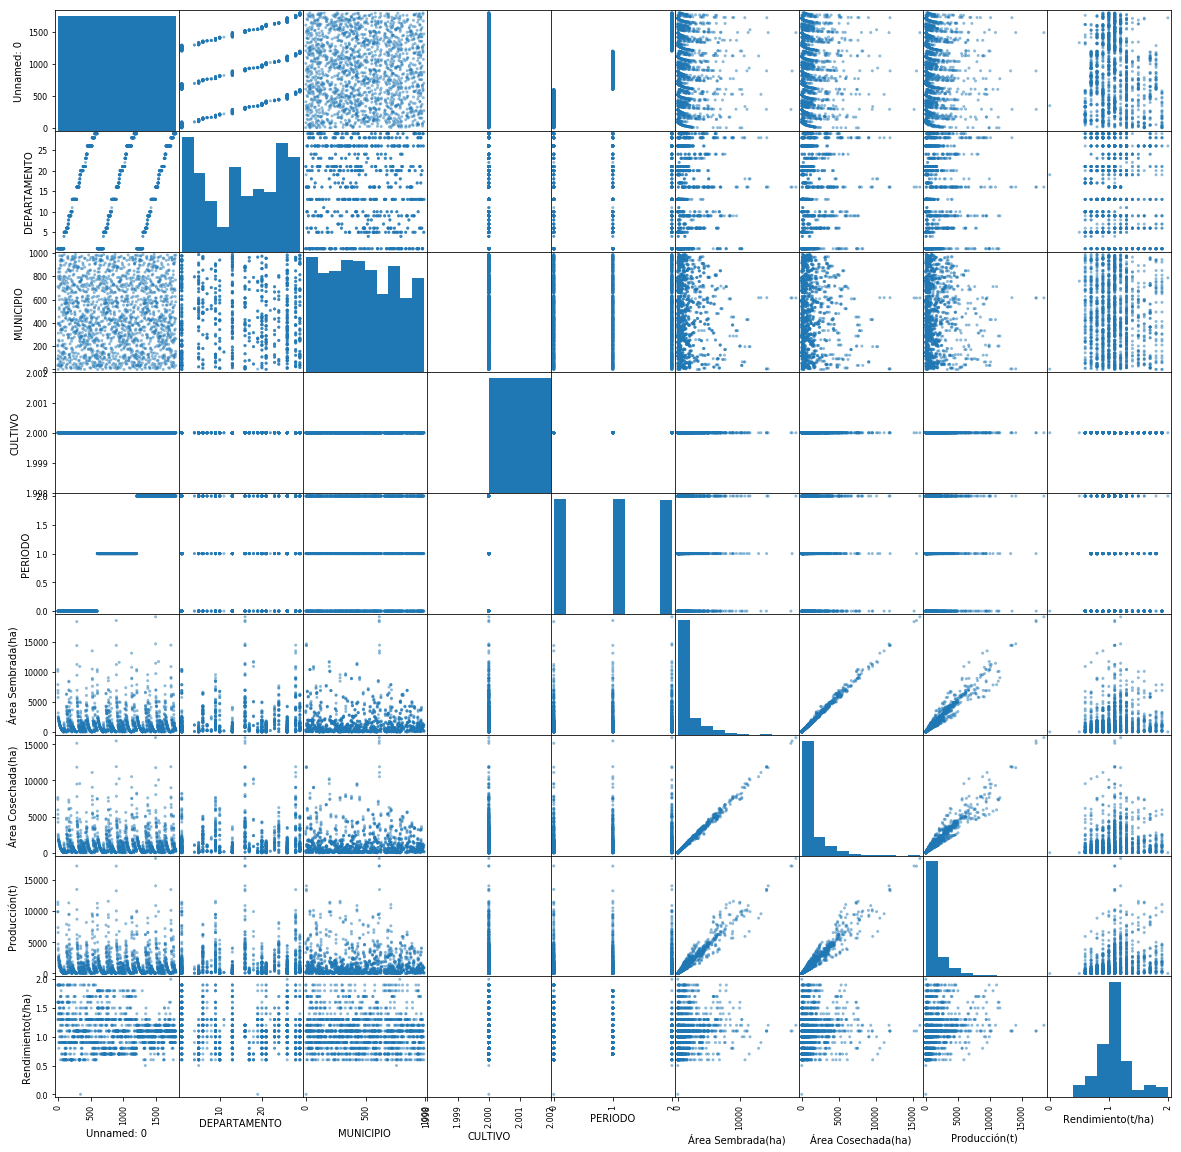

In [0]:
pd.plotting.scatter_matrix(dataset, figsize=(20,20));

In [0]:
dataset.describe()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
count,1799.000000,1799.000000,1799.000000,1799.0,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,899.000000,15.276820,471.160645,2.0,0.998332,1511.943302,1263.698166,1423.785436,1.088660
std,519.470885,9.528429,285.606433,0.0,0.816608,2165.030511,1780.815050,2083.344878,0.293144
min,0.000000,1.000000,0.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000
25%,449.500000,6.000000,235.000000,2.0,0.000000,213.500000,184.500000,190.000000,0.900000
50%,899.000000,16.000000,446.000000,2.0,1.000000,741.000000,642.000000,661.000000,1.100000
75%,1348.500000,26.000000,716.500000,2.0,2.000000,1789.500000,1517.500000,1701.000000,1.200000
max,1798.000000,29.000000,987.000000,2.0,2.000000,19119.000000,15931.000000,18440.000000,2.000000


In [0]:
dataset.head()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha)
0,0,1,35,2,0,10380,7648,9888,1.3
1,1,1,201,2,0,10063,7374,11439,1.6
2,2,1,711,2,0,7857,5929,11057,1.9
3,3,1,210,2,0,6880,5306,9896,1.9
4,4,1,91,2,0,6445,4749,7368,1.6


In [0]:
X = dataset.values[:,[0,2,3,4,5]]
y = dataset.values[:,6:7]

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
      #print(nfolds,)
      f = cross_val_score(est, X, y.ravel(), cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
      means.append(np.mean(f))
      stds.append(np.std(f))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

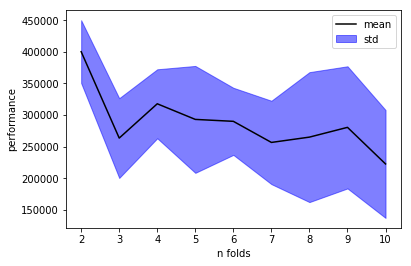

In [0]:
show_curve(DecisionTreeRegressor())

In [0]:
# Normalizacion de los datos de entrenamiento y test
Xnormalizer = StandardScaler().fit(X_train)
Ynormalizer = StandardScaler().fit(y_train)
XTrain = Xnormalizer.transform(X_train)
YTrain = Ynormalizer.transform(y_train)
XTest = normalizer.transform(X_test)


DTR = DecisionTreeRegressor()
DTR.fit(XTrain,y_train)

s = cross_val_score(DTR, XTrain, YTrain, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.068 (+/- 0.01727)


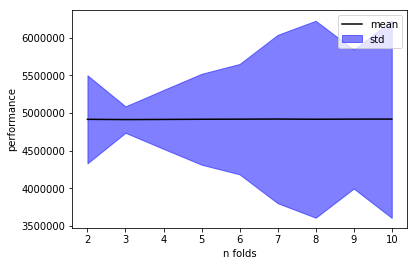

In [0]:
show_curve(SVR(gamma='auto'))

In [0]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')
svr.fit(X,y.ravel())
s = cross_val_score(svr, XTrain, YTrain.ravel(), cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.101 (+/- 0.10687)


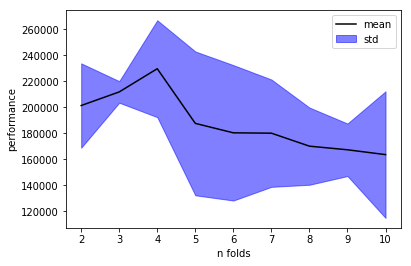

In [0]:
from sklearn.ensemble import RandomForestRegressor


show_curve(RandomForestRegressor(n_estimators = 100))

In [0]:
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X, y.ravel())
s = cross_val_score(RFR, XTrain, YTrain.ravel(), cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.049 (+/- 0.01505)


## Data treatment - Classification

In [0]:
for i in csvMapName:
  csvMapName[i]["class"] = ((csvMapName[i]["Área Cosechada(ha)"] > (csvMapName[i]["Área Sembrada(ha)"]-2000)) & (csvMapName[i]["Área Cosechada(ha)"] <= csvMapName[i]["Área Sembrada(ha)"]))*1
  


In [43]:
datasetC = csvMapName["Cafe"]
datasetC.head()

,DEPARTAMENTO,MUNICIPIO,CULTIVO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha),class
0,1,35,2,0,10380,7648,9888,1.3,0
1,1,201,2,0,10063,7374,11439,1.6,0
2,1,711,2,0,7857,5929,11057,1.9,1
3,1,210,2,0,6880,5306,9896,1.9,1
4,1,91,2,0,6445,4749,7368,1.6,1


In [0]:
from sklearn.model_selection import cross_val_score

X = datasetC.values[:,[0,2,4,5,6]]
y = datasetC.values[:,-1]

In [0]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [0]:
from sklearn.naive_bayes import GaussianNB


est = GaussianNB()

s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=tpr)
print ("tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=tnr)
print ("tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.969 (+/- 0.01196)
tpr 0.969 (+/- 0.00491)
tnr 1.000 (+/- 0.00000)


In [0]:
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier()

s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=tpr)
print ("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=tnr)
print ("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.997 (+/- 0.00215)
tpr      0.998 (+/- 0.00320)
tnr      0.833 (+/- 0.33333)


In [0]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(n_estimators = 100)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.997 (+/- 0.00373)
tpr      0.999 (+/- 0.00170)
tnr      0.700 (+/- 0.40000)


In [0]:
from sklearn.svm import SVC

est = SVC(gamma = 'auto')

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.991 (+/- 0.00558)
tpr      1.000 (+/- 0.00000)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tnr      nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
from sklearn.ensemble import RandomForestClassifier
dt =DecisionTreeClassifier()#SVC()#RandomForestClassifier()

X = datasetC.values[:,[0,2,4,5,6]]
y = datasetC.values[:,-1]

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print (dt.score(Xts,yts))

0.9922222222222222


In [0]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, KFold
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("X shape", X.shape)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (1799, 5)
accuracy 0.969 (+/- 0.01196)


In [0]:
X = PCA(n_components=3).fit_transform(X)
print ("shape after PCA ", X.shape)
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

shape after PCA  (1799, 3)
accuracy 0.964 (+/- 0.01091)
